In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
url = "/content/bank-additional-full.csv"
bank_data = pd.read_csv(url, sep=";")

In [ ]:
# Encode categorical variables using one-hot encoding
bank_data = pd.get_dummies(bank_data, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'], drop_first=True)

In [ ]:
# Convert the target variable 'y' (yes/no) to binary (1/0)
bank_data['y'] = bank_data['y'].map({'yes': 1, 'no': 0})


In [ ]:
# Split the data into features (X) and target (y)
X = bank_data.drop(columns=['y'])
y = bank_data['y']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

In [ ]:
# Fit the classifier on the training data
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.89


In [ ]:

# Generate a classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      7303
           1       0.50      0.52      0.51       935

    accuracy                           0.89      8238
   macro avg       0.72      0.73      0.72      8238
weighted avg       0.89      0.89      0.89      8238



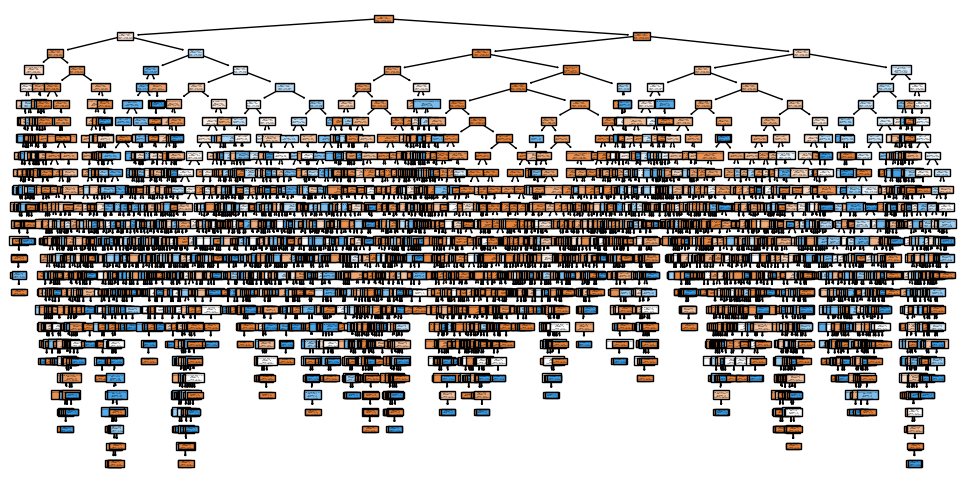

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No Purchase', 'Purchase'])
plt.show()